### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
os.chdir('..')
import sparklyRGT as rgt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


***

# 1) Load data into Python



In [2]:
#changes working directory to whatever is included in brackets
os.chdir("..\\data") 

#checks current working directory
os.getcwd()


'C:\\Users\\brett\\sparklyRGT\\data'

In [4]:
file_names = ['BH09_raw_baseline_S32-36.xlsx'] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,LossRGT_A,2021-08-16,12:06:53,25,0.0,1,0.0,NaN,32,1.1,...,0,0,0,1,3,0,0,0,0,0
1,LossRGT_A,2021-08-16,12:06:53,25,0.0,1,0.0,NaN,32,1.0,...,0,0,0,0,0,0,0,0,0,0
2,LossRGT_A,2021-08-16,12:06:53,25,0.0,1,0.0,NaN,32,2.0,...,1,2,40,0,0,0,0,0,0,0
3,LossRGT_A,2021-08-16,12:06:53,25,0.0,1,0.0,NaN,32,3.1,...,0,0,0,1,2,0,0,0,0,0
4,LossRGT_A,2021-08-16,12:06:53,25,0.0,1,0.0,NaN,32,3.0,...,0,0,0,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [10]:
loss = [25, 17, 21, 51, 55, 1, 5, 35, 39, 29, 9, 13, 43, 47, 10, 14, 26, 18, 22, 44, 48, 52, 56, 2, 6, 36, 40, 30]

outcome = [16, 28, 60, 50, 4, 38, 11, 23, 57, 45, 33, 63]

reverse = [15, 27, 59, 49, 3, 37, 20, 42, 54, 8, 32, 62]

random = [19, 41, 53, 7, 31, 61, 12, 24, 58, 46, 34, 64]

group_names = {0: 'loss',
              1: 'outcome',
              2: 'reverse',
              3: 'random'} 

group_list = [loss, outcome, reverse, random]

title = 'Cued variants' #for plotting

startsess = 32 #first session you would like to include in figures
endsess = 36 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [6]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2021-08-16  32         194.0
         2021-08-17  33         159.0
         2021-08-18  34         173.0
         2021-08-19  35         159.0
         2021-08-20  36         167.0
2        2021-08-16  32         153.0
         2021-08-17  33         153.0
         2021-08-18  34         143.0
         2021-08-19  35         140.0
         2021-08-20  36         150.0
3        2021-08-16  32          55.0
         2021-08-17  33          55.1
         2021-08-18  34          62.0
         2021-08-19  35          53.0
         2021-08-20  36          65.1
4        2021-08-16  32          72.0
         2021-08-17  33          93.0
         2021-08-18  34          97.1
         2021-08-19  35          93.1
         2021-08-20  36         100.0
5        2021-08-16  32          78.0
         2021-08-17  33          75.0
         2021-08-18  34          78.0
         2021-08-19  35          68.0
         2021-08-20  36          72.0
6        2021-08-16  

### Drop/edit session numbers

In [ ]:
# df2 = rgt.drop_sessions(df, [])
# df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [2], subs = [58, 59, 60])

In [7]:
df.Session.unique()

array([32, 33, 34, 35, 36], dtype=int64)

### Check that you dropped/edited the desired session(s)

In [14]:
# rgt.check_sessions(df2) 

NameError: name 'df2' is not defined

## Data processing

### Calculate variables for each rat


In [8]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum

,32P1,32P2,32P3,32P4,33P1,33P2,33P3,33P4,34P1,34P2,...,trial32,trial33,trial34,trial35,trial36,prem32,prem33,prem34,prem35,prem36
1,6.21762,93.7824,0,0,10.0629,89.9371,0,0,6.35838,93.6416,...,194.0,159.0,173.0,159.0,167.0,1.020408,11.666667,7.486631,7.017544,6.179775
2,15.0327,82.3529,1.30719,1.30719,13.7255,83.0065,1.30719,1.96078,18.8811,81.1189,...,153.0,153.0,143.0,140.0,150.0,7.272727,7.272727,12.269939,9.090909,6.832298
3,7.27273,3.63636,89.0909,0,3.63636,0,96.3636,0,1.6129,0,...,55.0,55.1,62.0,53.0,65.1,43.298969,47.619048,36.734694,47.524752,29.670330
4,0,75,25,0,1.07527,76.3441,22.5806,0,0,86.4583,...,72.0,93.0,97.1,93.1,100.0,52.941176,40.000000,23.809524,38.255034,35.064935
5,14.1026,83.3333,0,2.5641,17.8082,72.6027,0,9.58904,14.1026,84.6154,...,78.0,75.0,78.0,68.0,72.0,19.587629,15.730337,8.235294,5.555556,13.253012
6,0,97.4359,2.5641,0,2.30769,95.3846,1.53846,0.769231,0.78125,99.2188,...,119.0,132.1,131.0,133.0,141.0,18.493151,8.333333,9.027778,3.623188,6.622517
7,14.2857,80.9524,0,4.7619,3.14961,95.2756,1.5748,0,1.43885,95.6835,...,22.0,127.0,143.1,110.0,118.0,15.384615,2.307692,1.379310,1.785714,3.278689
8,20.6897,77.5862,0,1.72414,12.5,87.5,0,0,14.7826,84.3478,...,116.0,137.1,117.0,124.0,130.0,29.696970,17.575758,4.878049,3.875969,0.763359
9,35.4167,14.5833,50,0,28.7234,21.2766,50,0,31.4607,11.236,...,97.0,97.0,90.0,107.0,85.0,5.825243,2.020202,1.098901,3.603604,5.555556
10,0,100,0,0,3.66972,93.578,1.83486,0.917431,4.9505,94.0594,...,69.0,110.0,103.0,64.0,119.0,2.816901,3.508772,0.961538,0.000000,0.000000


### Get the risk status of the rats


In [11]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

     mean_risk  risk_status
1    97.772003          1.0
2    96.542297          1.0
3   -91.036657          2.0
4    62.229336          1.0
5    91.601003          1.0
6    97.456083          1.0
7    93.645445          1.0
8    98.324815          1.0
9     0.902181          1.0
10   96.598281          1.0
11  -73.090153          2.0
12  100.000000          1.0
13   81.958441          1.0
14   99.720280          1.0
15   33.743106          1.0
16  -15.762318          2.0
17   93.159727          1.0
18   97.491236          1.0
19   89.754020          1.0
20   95.157661          1.0
21   82.381920          1.0
22   38.562354          1.0
23   88.249248          1.0
24   99.636364          1.0
25   -3.404281          2.0
26   34.648342          1.0
27  -52.150436          2.0
28   62.585593          1.0
29   99.272727          1.0
30   99.287843          1.0
31   90.370884          1.0
32   98.655462          1.0
33   99.266112          1.0
34  100.000000          1.0
35   99.405196      

### Export your data to an Excel file 


In [12]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'RGT_variant', new_file_name = 'BH09_baseline_2.xlsx')

## Calculate means and SEMs for your experimental groups



In [13]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,32P1,32P2,32P3,32P4,33P1,33P2,33P3,33P4,34P1,34P2,...,trial34,trial35,trial36,prem32,prem33,prem34,prem35,prem36,mean_risk,risk_status
loss,8.50266,82.6156,5.52967,3.35211,9.76186,81.7235,5.41902,3.09562,8.92592,82.0392,...,120.079,117.65,116.868,12.2431,12.5764,6.66598,5.99226,6.83212,82.2171,1.03571
outcome,3.76565,65.4295,27.4588,3.34605,3.2288,60.0558,34.3449,2.37054,3.1909,64.0337,...,103.7,103.133,98.8417,30.6328,26.0213,17.8623,14.5063,18.3804,33.4911,1.33333
reverse,5.18685,70.3569,22.5617,1.89449,5.57929,69.1478,23.2428,2.03011,4.39699,73.6549,...,103.092,102.6,97.3417,18.9517,20.3193,14.3735,12.7298,13.3157,51.189,1.16667
random,14.9881,78.5881,5.77669,0.647179,13.4124,79.7545,6.61809,0.214947,13.2551,79.2748,...,133.175,125.333,122.758,17.1417,15.1769,7.37694,7.20953,8.42631,86.3849,1.08333


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


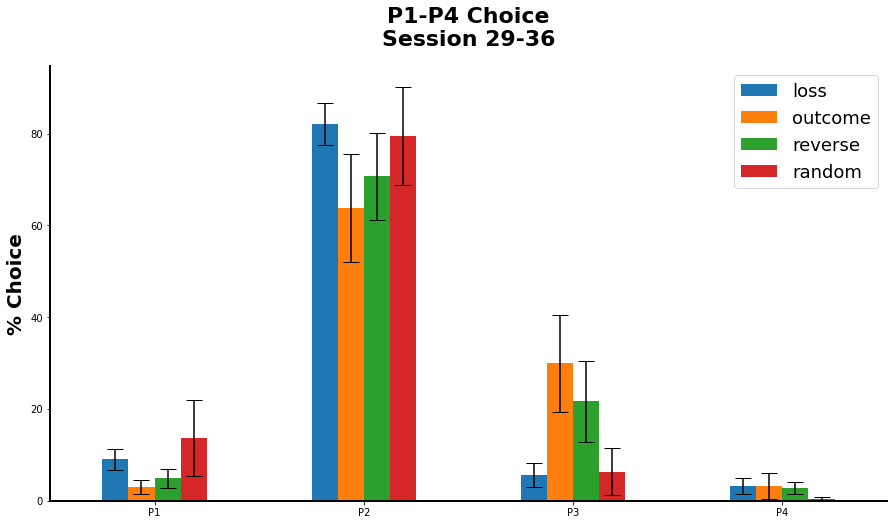

In [14]:
rgt.choice_bar_plot(29, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


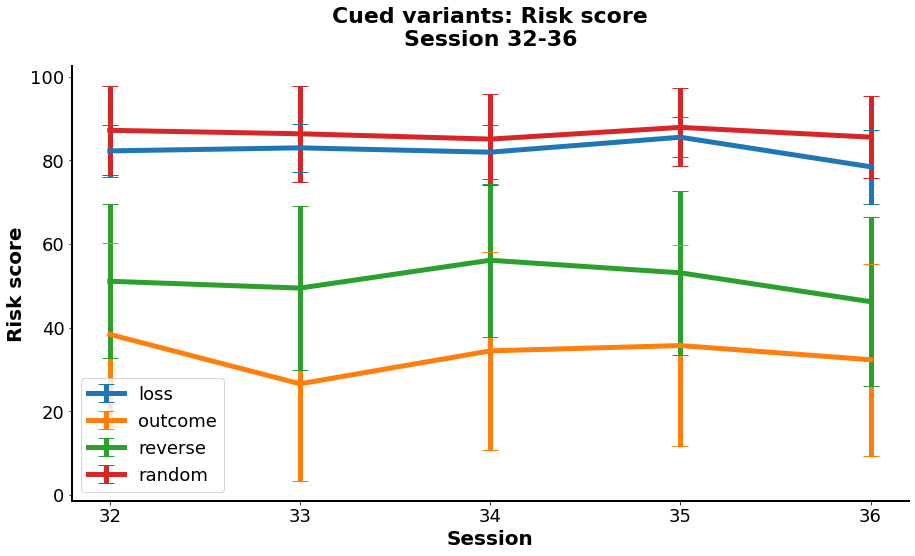

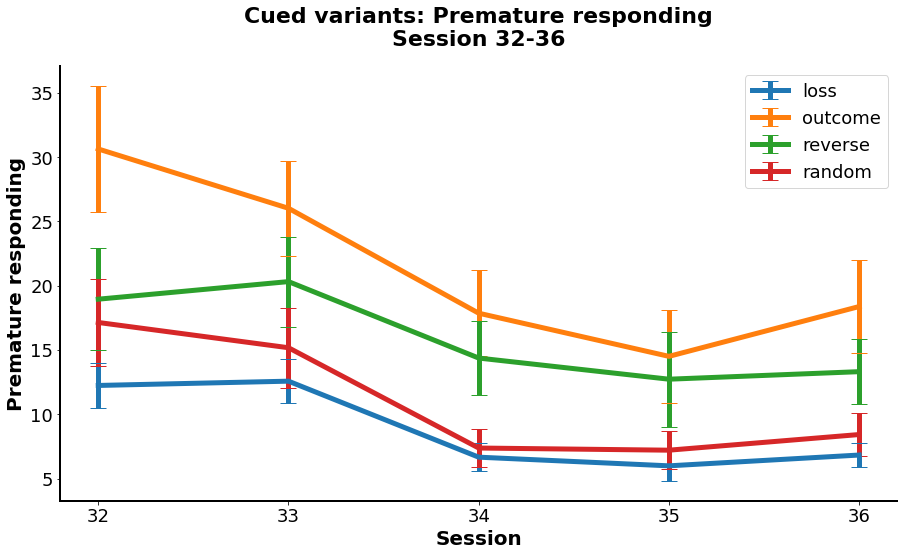

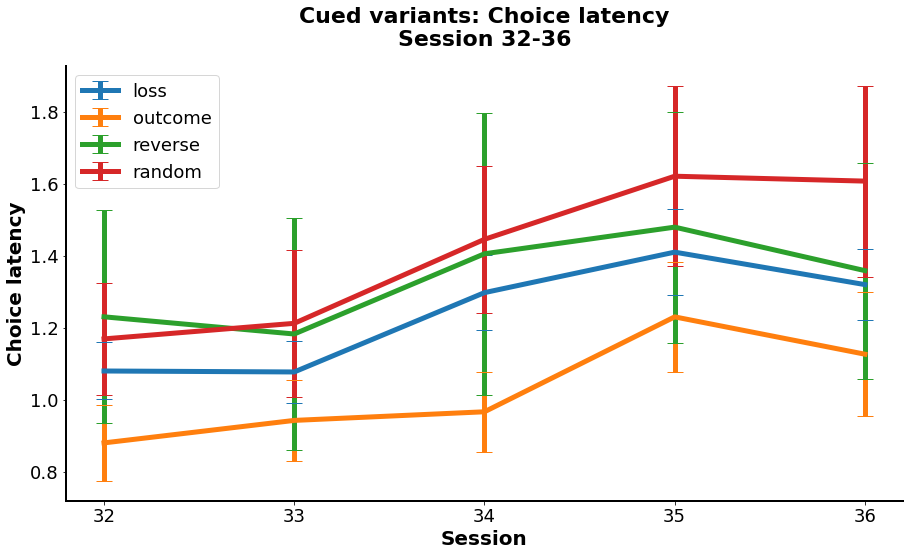

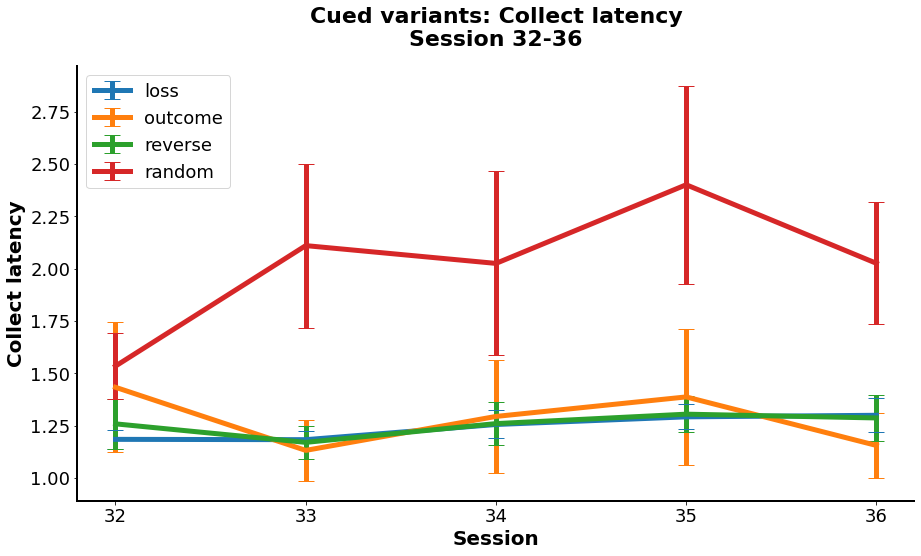

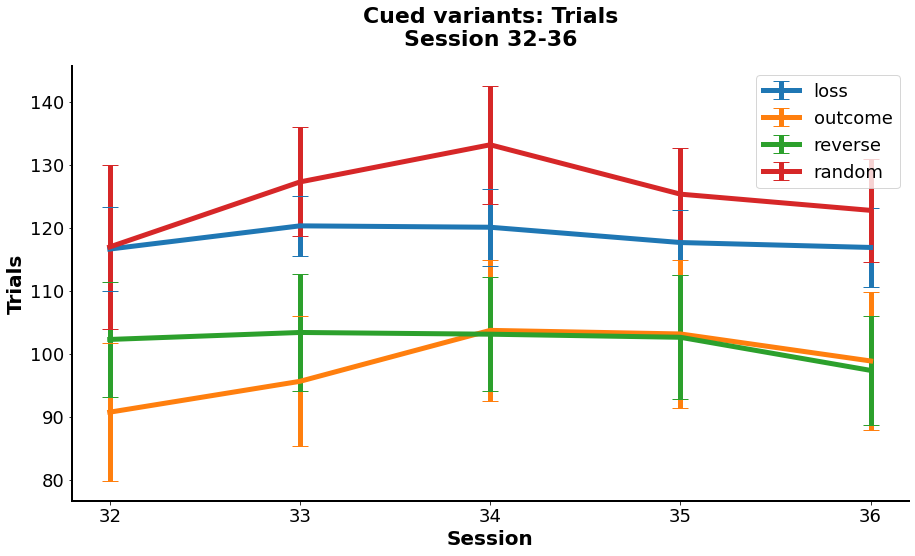

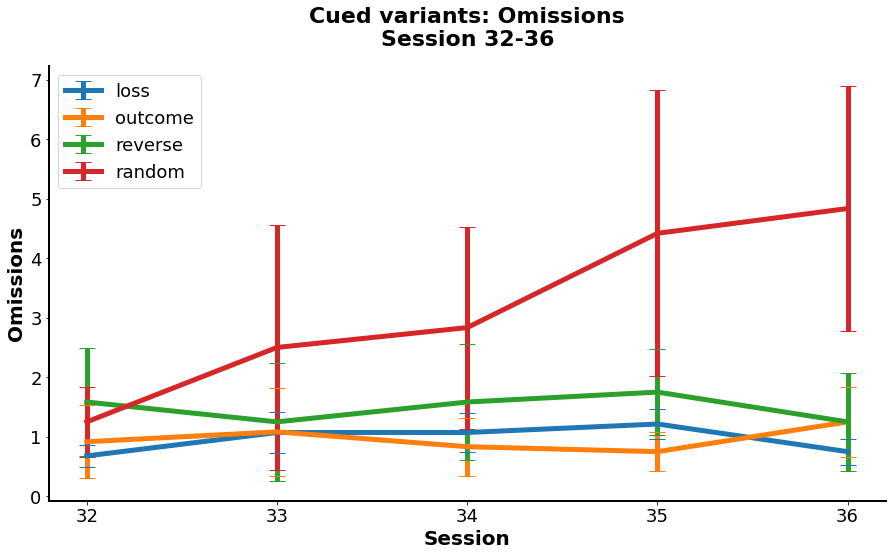

In [16]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

rgt.rgt_plot('choice_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Choice latency')

rgt.rgt_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Collect latency')

rgt.rgt_plot('trial', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Trials')

rgt.rgt_plot('omit', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Omissions')

## Bar plot of other variables



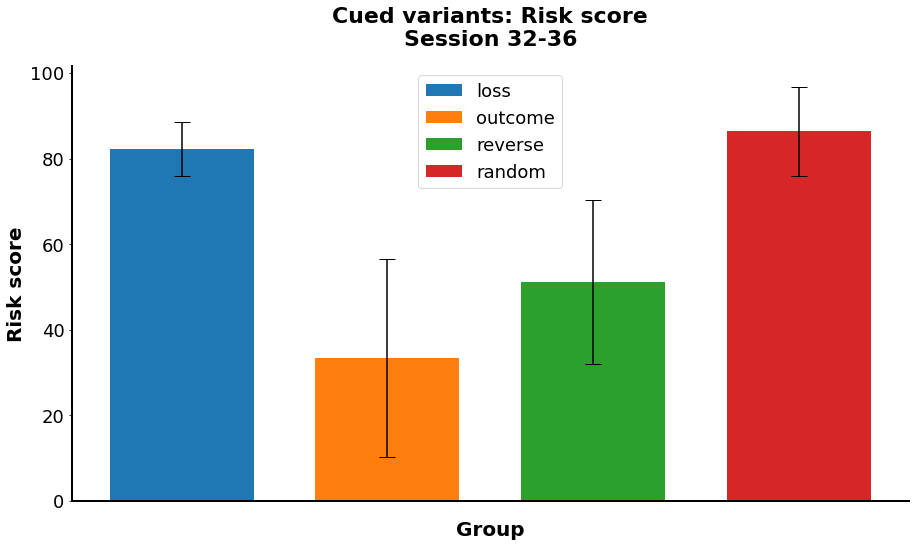

In [22]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')


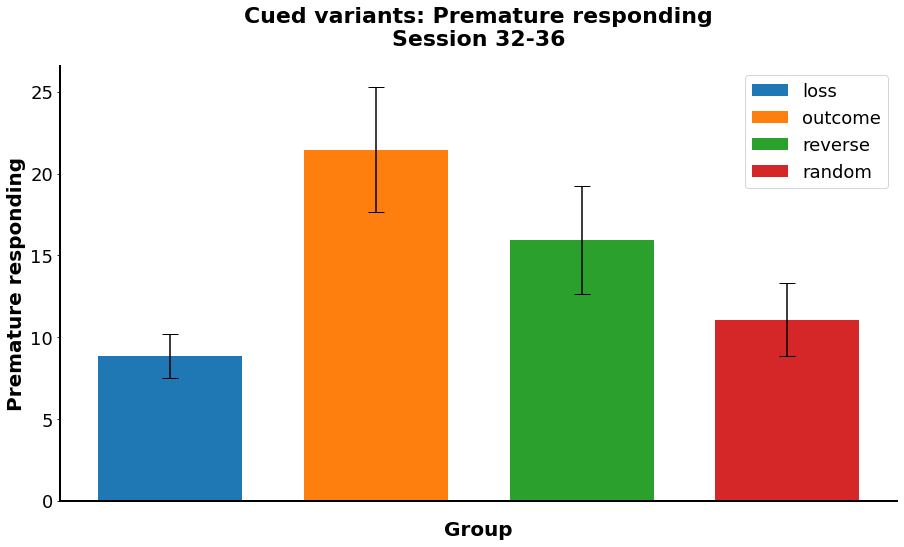

In [21]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Premature responding')

In [18]:
df_long = rgt.get_long_summary_data(df, df_sum)

In [19]:
rgt.check_stability(df_long, sessions = [34,35,36] )

({'choice_lat': 0.0012272132585939186, 'trial': 0.029533302465981723},
 {'P1': 0.9529608724555111,
  'P2': 0.14074903452661014,
  'P3': 0.16867482194800856,
  'P4': 0.548673678173411,
  'risk': 0.10895519777215994,
  'collect_lat': 0.1114621304678884,
  'omit': 0.30801574420521866,
  'prem': 0.15935459295586782})